*Importing Libraries for later use*

In [ ]:
#importing all the libraries that we needed in project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Loaded further libraries when needed

In [ ]:
#Loading the Dataset, the file was uploaded in the Files Folder of Google colab
df=pd.read_csv('comments_cleaned.csv')
df.head(5)

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7488.0,3743.500000,2161.743741,0.0,1871.75,3743.5,5615.25,7487.0
id,7488.0,3744.500000,2161.743741,1.0,1872.75,3744.5,5616.25,7488.0
User id,7488.0,48.949386,28.354045,2.0,24.00,48.0,72.00,100.0
Photo id,7488.0,129.099225,73.776439,1.0,65.00,130.0,193.00,257.0
Hashtags used count,7488.0,2.416667,1.705905,0.0,1.00,2.0,3.25,6.0


In [ ]:
df.nunique()

Unnamed: 0             7488
id                     7488
comment                7467
User  id                 77
Photo id                257
created Timestamp         1
posted date               1
emoji used                2
Hashtags used count       7
dtype: int64

<ipython-input-5-246b4fd44942>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno')


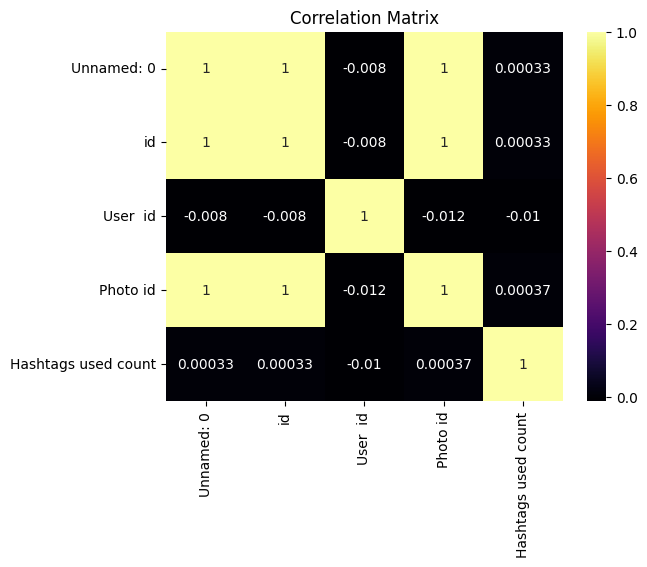

In [ ]:
# Correlation analysis
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Dropped unncessary columns
df.drop(['id', 'created Timestamp', 'posted date','Unnamed: 0'], axis=1, inplace=True)
df['emoji_used']=df['emoji used']
#Label Encoding emoji used column to 1 or 0
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['emoji used'] = label_encoder.fit_transform(df['emoji used'])
df

,comment,User id,Photo id,emoji used,Hashtags used count,emoji_used
0,unde at dolorem,2,1,1,1,yes
1,quae ea ducimus,3,1,0,2,no
2,alias a voluptatum,5,1,0,4,no
3,facere suscipit sunt,14,1,1,2,yes
4,totam eligendi quaerat,17,1,1,1,yes
...,...,...,...,...,...,...
7483,accusamus vel est,82,257,0,5,no
7484,sit nulla qui,91,257,0,6,no
7485,sed quidem vitae,93,257,1,2,yes
7486,dolorem eveniet rerum,95,257,1,1,yes


Sentimental Analysis

In [ ]:
print(df.isnull().sum())

comment                0
User  id               0
Photo id               0
emoji used             0
Hashtags used count    0
emoji_used             0
dtype: int64


Clearly no need for imputation.. also not standardising or minimising!

# *EDA*

    User  id  Hashtags used count
46        57                  654
18        21                  650
20        24                  634
34        41                  620
60        76                  618
3          5                  618
59        75                  615
52        66                  614
67        91                  612
29        36                  607


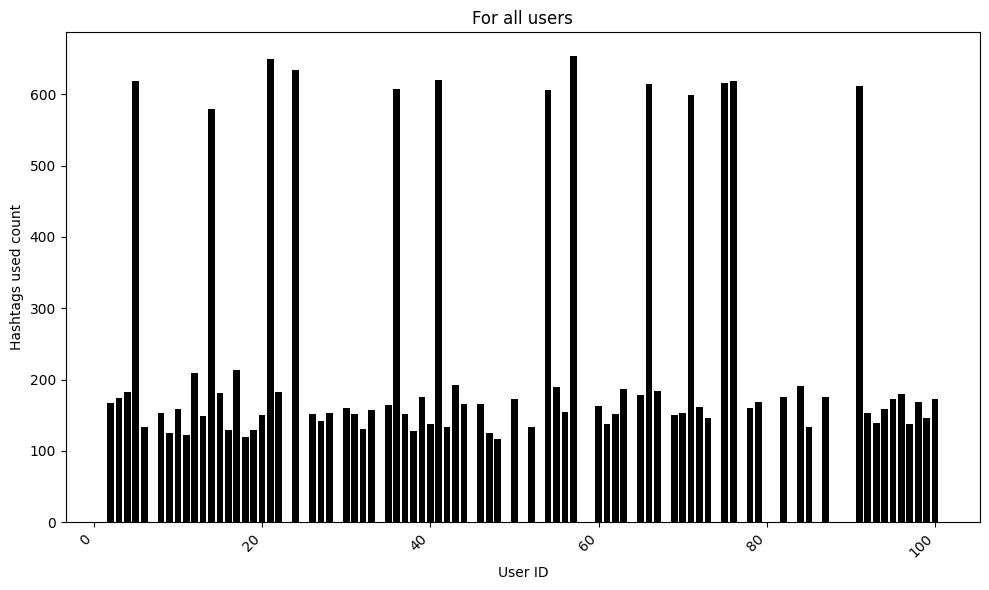

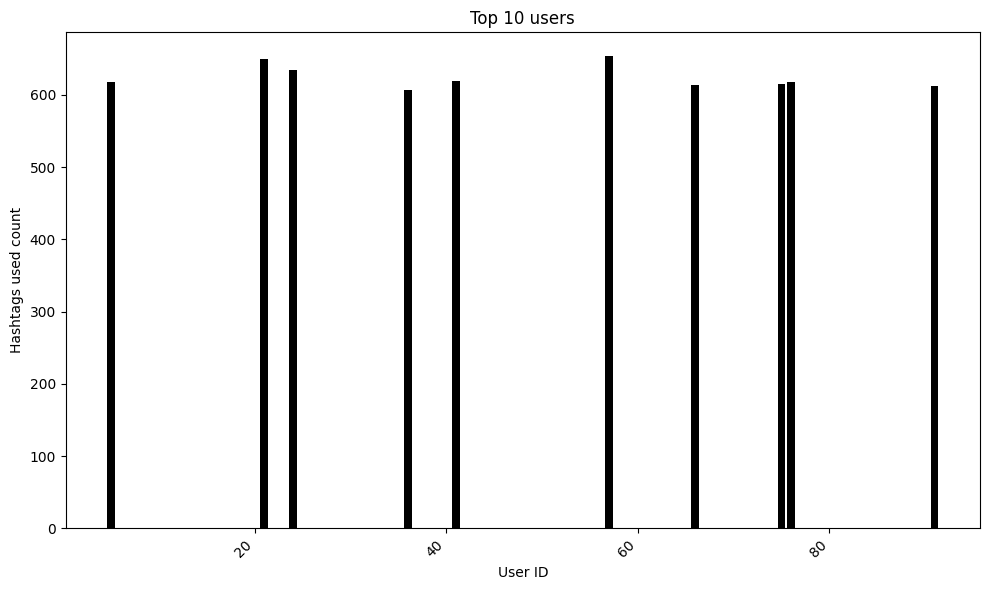

In [ ]:
# Top users by no of hastags
user_hashtags = df.groupby('User  id')['Hashtags used count'].sum().reset_index()
# user_hashtags.set_index('User  id', inplace=True)
# Display the top 10 users by total hashtags used
top_users_hashtags = user_hashtags.sort_values(by='Hashtags used count', ascending=False).head(10)
print(top_users_hashtags)

#Displaying for all users
plt.figure(figsize=(10, 6))
plt.bar(user_hashtags['User  id'],user_hashtags ['Hashtags used count'], color='black', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Hashtags used count')
plt.title('For all users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()
#Displaying for top 10 users
plt.figure(figsize=(10, 6))
plt.bar(top_users_hashtags['User  id'],top_users_hashtags ['Hashtags used count'], color='black', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Hashtags used count')
plt.title('Top 10 users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

     Photo id  Comment Count
12         13             39
156       157             39
246       247             39
7           8             38
145       146             37
28         29             36
224       225             36
142       143             36
175       176             35
195       196             35


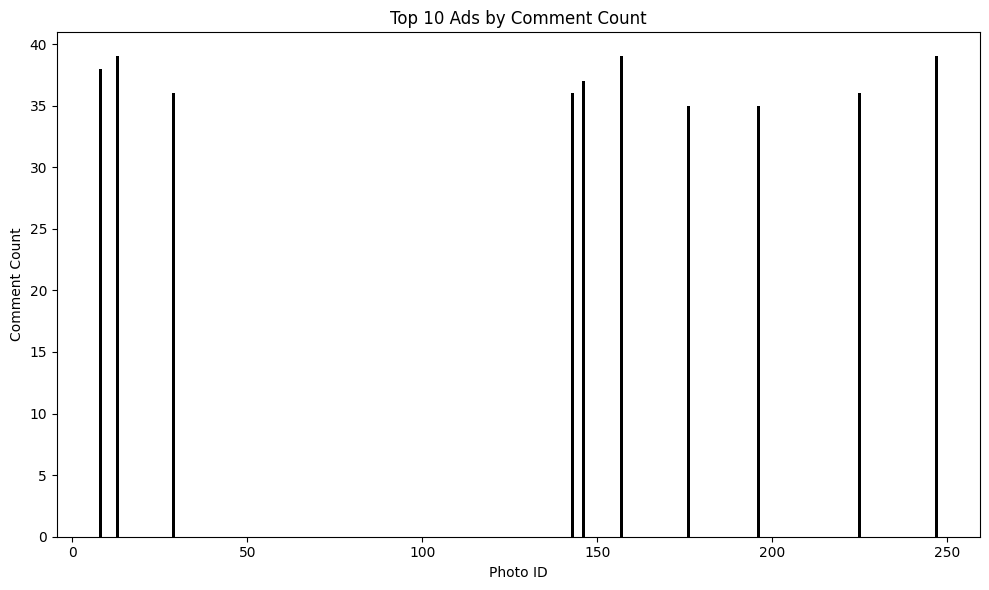

In [ ]:
#Top Photos by comments
ad_engagement = df.groupby('Photo id')['User  id'].count().reset_index()
ad_engagement.columns = ['Photo id', 'Comment Count']
# Display the top 10 ads by comment count
top_ads = ad_engagement.sort_values(by='Comment Count', ascending=False).head(10)
print(top_ads)

#Top 10
plt.figure(figsize=(10, 6))
plt.bar(top_ads['Photo id'],top_ads['Comment Count'], color='black', linewidth=2)
plt.xlabel('Photo ID')
plt.ylabel('Comment Count')
plt.title('Top 10 Ads by Comment Count')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

    User  id  Emoji Usage %
39        47      62.711864
73        97      60.294118
40        48      60.000000
55        70      59.420290
33        40      58.823529


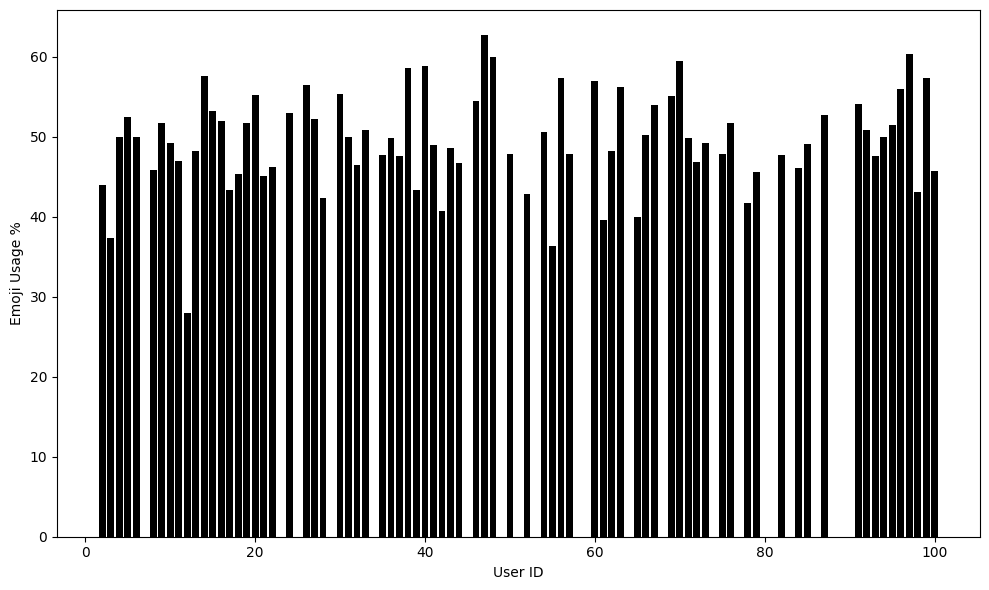

In [ ]:
#Top Users with emoji use
emoji_usage_percentage = df.groupby('User  id')['emoji used'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='Emoji Usage %')
# emoji_usage_percentage.set_index('User  id', inplace=True)
emoji_usage_percentage = emoji_usage_percentage.sort_values(by='Emoji Usage %', ascending=False)
# Display the result
print(emoji_usage_percentage.head())


plt.figure(figsize=(10, 6))
plt.bar(emoji_usage_percentage ['User  id'],emoji_usage_percentage ['Emoji Usage %'], color='black', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Emoji Usage %')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


    User  id  Comment Count
0         75            257
1         36            257
2         76            257
3         71            257
4         66            257
5         57            257
6         91            257
7         41            257
8         54            257
9         24            257
10        21            257
11        14            257
12         5            257
13        17             83
14        63             80
15        15             77
16        67             76
17        84             76
18        96             75
19        87             74


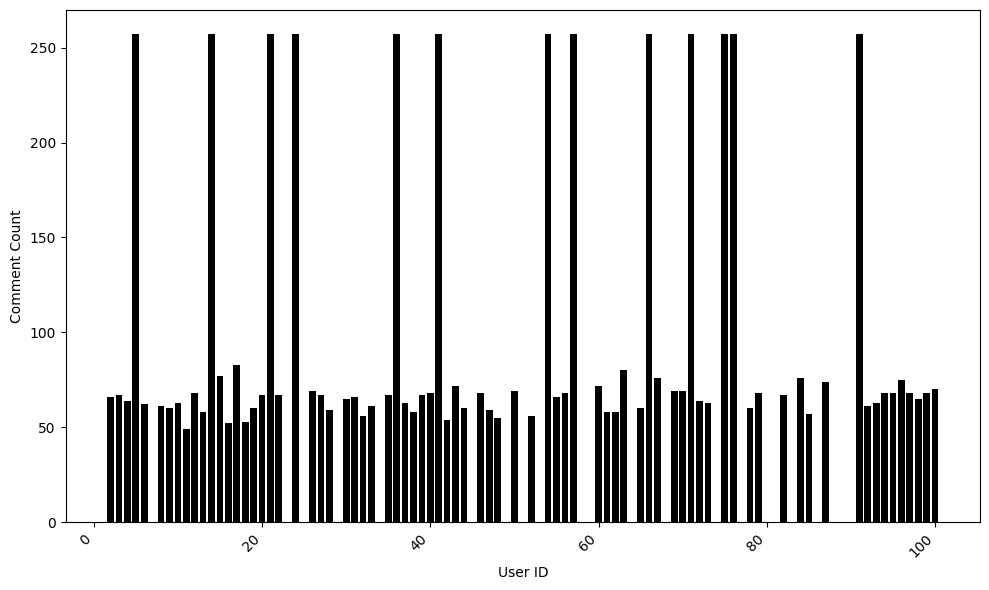

In [ ]:
#Comments by User ID
comments_per_user = df['User  id'].value_counts().reset_index()
comments_per_user.columns = ['User  id', 'Comment Count']

print(comments_per_user.head(20))
#Top Commenter
plt.figure(figsize=(10, 6))
plt.bar(comments_per_user['User  id'],comments_per_user ['Comment Count'], color='black', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Comment Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


<ipython-input-12-246b4fd44942>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno')


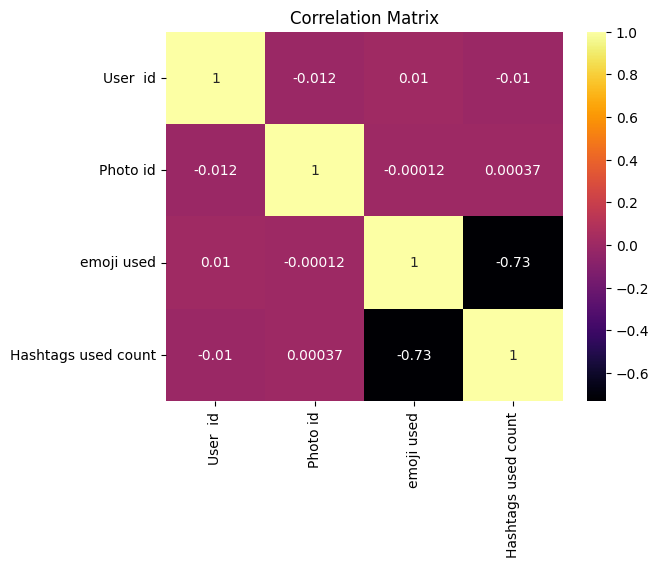

In [ ]:
# Correlation analysis
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlation Matrix')
plt.show()


Sentimental Analysis

In [ ]:
pip install vaderSentiment pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


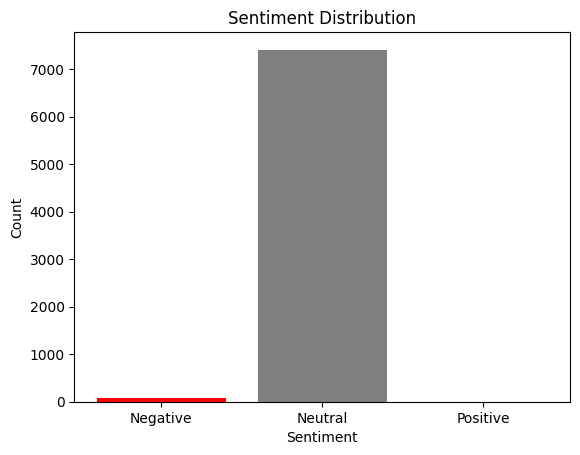

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
analyzer = SentimentIntensityAnalyzer()


df['compound_score'] = df['comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

df['sentiment'] = pd.cut(df['compound_score'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts = sentiment_counts.reindex(['Negative', 'Neutral', 'Positive'])

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()



In [ ]:
from tabulate import tabulate
summary_table = pd.DataFrame(df['sentiment'].value_counts()).rename(columns={'sentiment': 'Count'})

# Display the table
print(tabulate(summary_table, headers='keys', tablefmt='grid'))

+----------+---------+
|          |   Count |
+==========+=========+
| Neutral  |    7408 |
+----------+---------+
| Negative |      80 |
+----------+---------+
| Positive |       0 |
+----------+---------+


In [ ]:
df

,comment,User id,Photo id,emoji used,Hashtags used count,emoji_used,compound_score,sentiment
0,unde at dolorem,2,1,1,1,yes,0.0,Neutral
1,quae ea ducimus,3,1,0,2,no,0.0,Neutral
2,alias a voluptatum,5,1,0,4,no,0.0,Neutral
3,facere suscipit sunt,14,1,1,2,yes,0.0,Neutral
4,totam eligendi quaerat,17,1,1,1,yes,0.0,Neutral
...,...,...,...,...,...,...,...,...
7483,accusamus vel est,82,257,0,5,no,0.0,Neutral
7484,sit nulla qui,91,257,0,6,no,0.0,Neutral
7485,sed quidem vitae,93,257,1,2,yes,0.0,Neutral
7486,dolorem eveniet rerum,95,257,1,1,yes,0.0,Neutral


In [ ]:
# #Distribution of sentiment labels
# sns.countplot(x='sentiment', data=df)
# plt.title('Distribution of Sentiments')
# plt.show()

# # Pairplot with scatter plots for numerical features
# sns.pairplot(df, hue='sentiment', vars=numerical_features, plot_kws={'alpha': 0.5})
# plt.suptitle('Pairplot for Numerical Features by Sentiment')
# plt.show()

# # Boxplots for numerical features grouped by sentiment
# for feature in numerical_features:
#     sns.boxplot(x='sentiment', y=feature, data=df)
#     plt.title(f'{feature} by Sentiment')
#     plt.show()
df['compound_score'].unique()

array([ 0.    , -0.4019, -0.6597])

In [ ]:
# Basic statistics for numerical features
numerical_features = ['emoji used', 'Hashtags used count', 'compound_score']
print(df[numerical_features].describe())

        emoji used  Hashtags used count  compound_score
count  7488.000000          7488.000000     7488.000000
mean      0.500000             2.416667       -0.004328
std       0.500033             1.705905        0.041758
min       0.000000             0.000000       -0.659700
25%       0.000000             1.000000        0.000000
50%       0.500000             2.000000        0.000000
75%       1.000000             3.250000        0.000000
max       1.000000             6.000000        0.000000


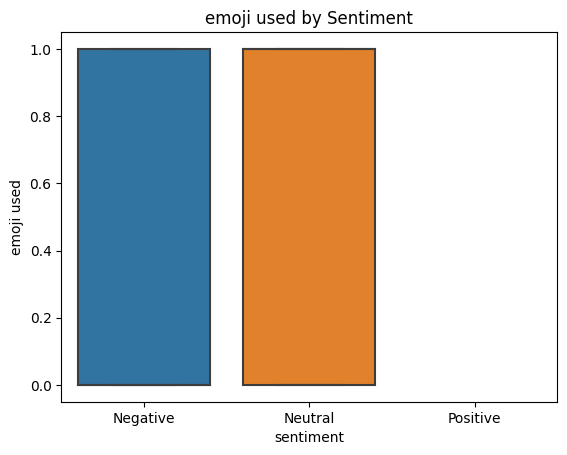

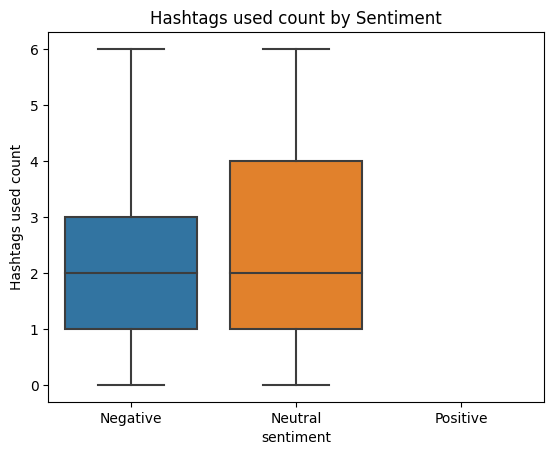

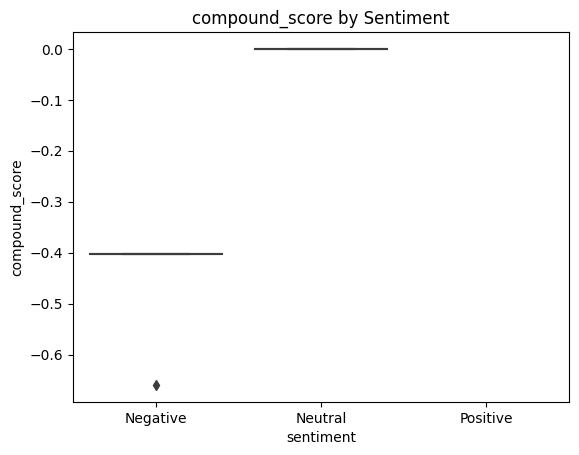

In [ ]:
# Boxplots for numerical features grouped by sentiment
for feature in numerical_features:
    sns.boxplot(x='sentiment', y=feature, data=df)
    plt.title(f'{feature} by Sentiment')
    plt.show()

In [ ]:
sentiment_mapping = {'Neutral': 0, 'Negative': -1}
df['sentiment_polarity']=df['sentiment']
df['sentiment_polarity'] = df['sentiment_polarity'].map(sentiment_mapping).fillna(df['sentiment_polarity'])

df

,comment,User id,Photo id,emoji used,Hashtags used count,emoji_used,compound_score,sentiment,sentiment_polarity
0,unde at dolorem,2,1,1,1,yes,0.0,Neutral,0.0
1,quae ea ducimus,3,1,0,2,no,0.0,Neutral,0.0
2,alias a voluptatum,5,1,0,4,no,0.0,Neutral,0.0
3,facere suscipit sunt,14,1,1,2,yes,0.0,Neutral,0.0
4,totam eligendi quaerat,17,1,1,1,yes,0.0,Neutral,0.0
...,...,...,...,...,...,...,...,...,...
7483,accusamus vel est,82,257,0,5,no,0.0,Neutral,0.0
7484,sit nulla qui,91,257,0,6,no,0.0,Neutral,0.0
7485,sed quidem vitae,93,257,1,2,yes,0.0,Neutral,0.0
7486,dolorem eveniet rerum,95,257,1,1,yes,0.0,Neutral,0.0


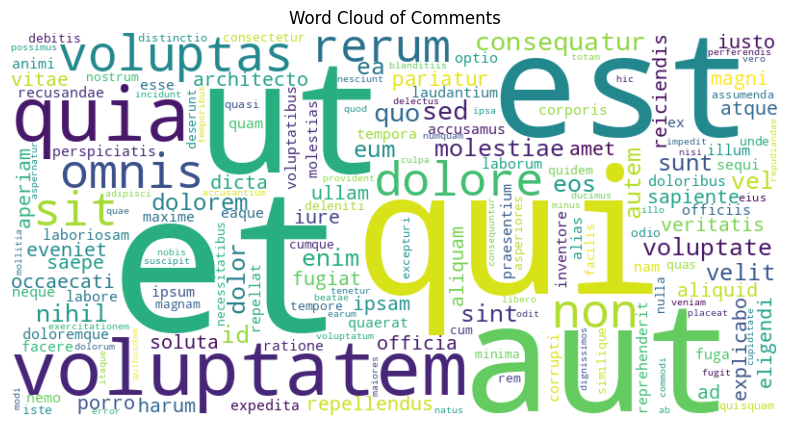

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['comment'].dropna())

# Generate and plot a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()


In [ ]:
#Create a table with percentages
emoji_sentiment_proportions = pd.crosstab(index=df['sentiment'], columns=df['emoji_used'], normalize='index') * 100

# Display the table
print(emoji_sentiment_proportions)


emoji_used         no        yes
sentiment                       
Negative    53.750000  46.250000
Neutral     49.959503  50.040497


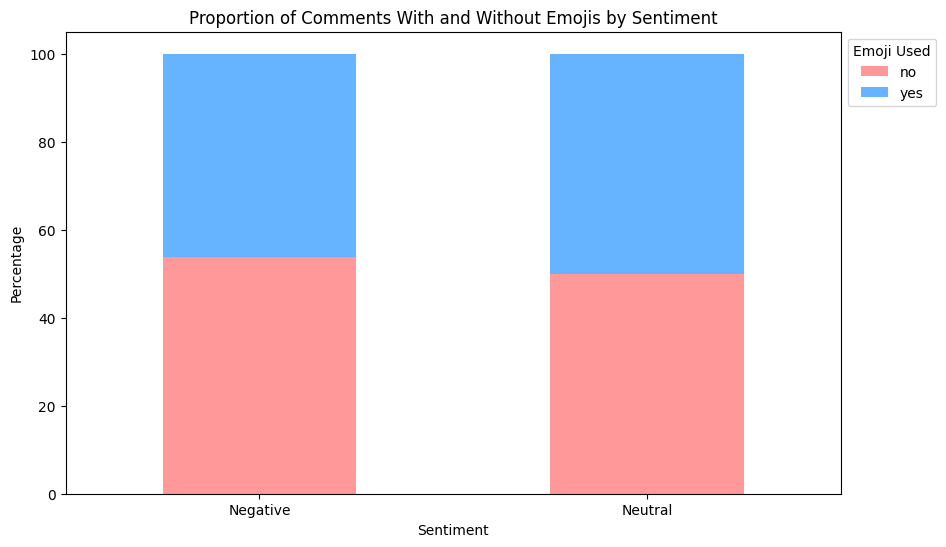

In [ ]:

# Define custom colors
colors = ['#ff9999', '#66b3ff']

# Visualize the proportions with custom colors
emoji_sentiment_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Proportion of Comments With and Without Emojis by Sentiment')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.legend(title='Emoji Used', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


Top 20 users by Comment Count:
75    257
36    257
76    257
71    257
66    257
57    257
91    257
41    257
54    257
24    257
21    257
14    257
5     257
17     83
63     80
15     77
67     76
84     76
96     75
87     74
Name: User  id, dtype: int64

Sentiment Distribution for Each Top user:
sentiment     Neutral  Negative  Positive
User  id                                 
5           98.054475  1.945525       0.0
14          98.054475  1.945525       0.0
15         100.000000  0.000000       0.0
17         100.000000  0.000000       0.0
21          98.832685  1.167315       0.0
24          98.443580  1.556420       0.0
36          99.610895  0.389105       0.0
41          98.832685  1.167315       0.0
54          99.221790  0.778210       0.0
57          99.221790  0.778210       0.0
63          97.500000  2.500000       0.0
66          99.610895  0.389105       0.0
67         100.000000  0.000000       0.0
71          99.221790  0.778210       0.0
75          99.610895  0.

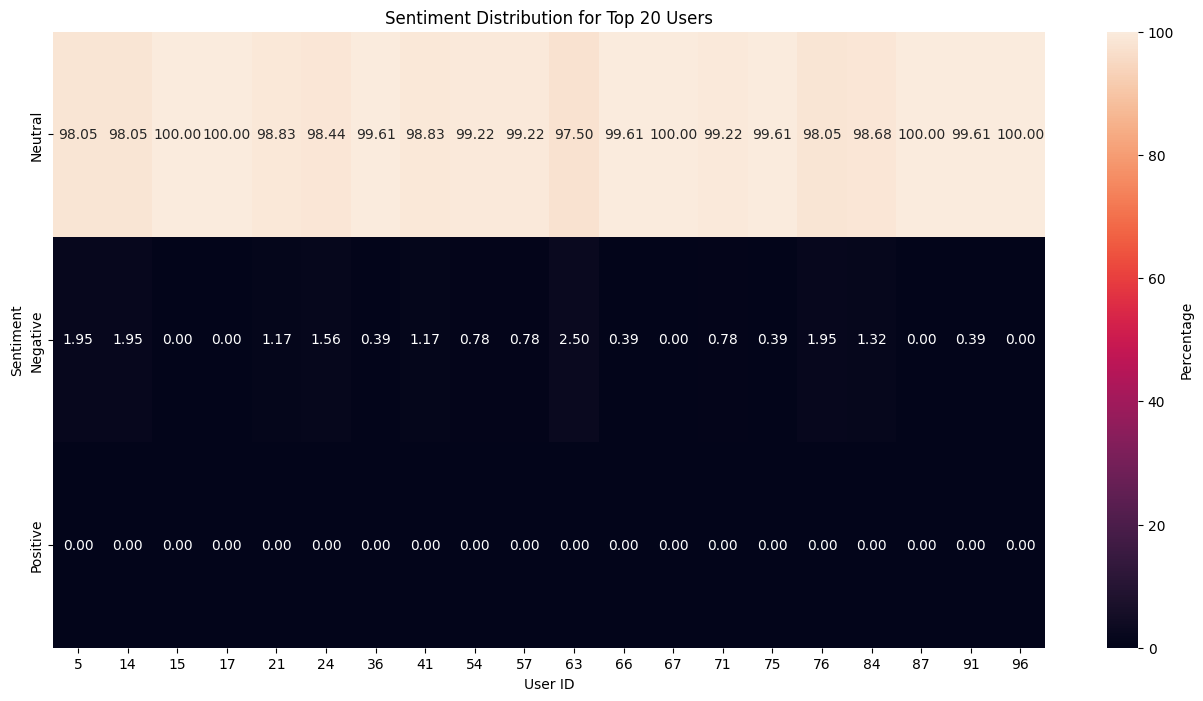

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Count the number of comments per user
user_comment_counts = df['User  id'].value_counts()

# Identify the 20 most active users
top_users = user_comment_counts.nlargest(20)

# For each of the top users, calculate the sentiment distribution of their comments
top_user_sentiments = df[df['User  id'].isin(top_users.index)].groupby('User  id')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Convert to percentages
top_user_sentiments = top_user_sentiments * 100

print("Top 20 users by Comment Count:")
print(top_users)
print("\nSentiment Distribution for Each Top user:")
print(top_user_sentiments)

custom_palette = sns.color_palette("rocket", as_cmap=True)
# Plot the sentiment distribution for each of the top users
plt.figure(figsize=(16, 8))
sns.heatmap(top_user_sentiments.T, cmap=custom_palette, annot=True, fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Sentiment Distribution for Top 20 Users')
plt.xlabel('User ID')
plt.ylabel('Sentiment')
plt.show()


Top 10 Photos by Comment Count:
13     39
157    39
247    39
8      38
146    37
29     36
225    36
143    36
176    35
196    35
Name: Photo id, dtype: int64

Sentiment Distribution for Each Top Photo:
sentiment     Neutral  Negative  Positive
Photo id                                 
8           97.368421  2.631579       0.0
13         100.000000  0.000000       0.0
29         100.000000  0.000000       0.0
143         97.222222  2.777778       0.0
146        100.000000  0.000000       0.0
157         94.871795  5.128205       0.0
176        100.000000  0.000000       0.0
196         97.142857  2.857143       0.0
225        100.000000  0.000000       0.0
247         97.435897  2.564103       0.0


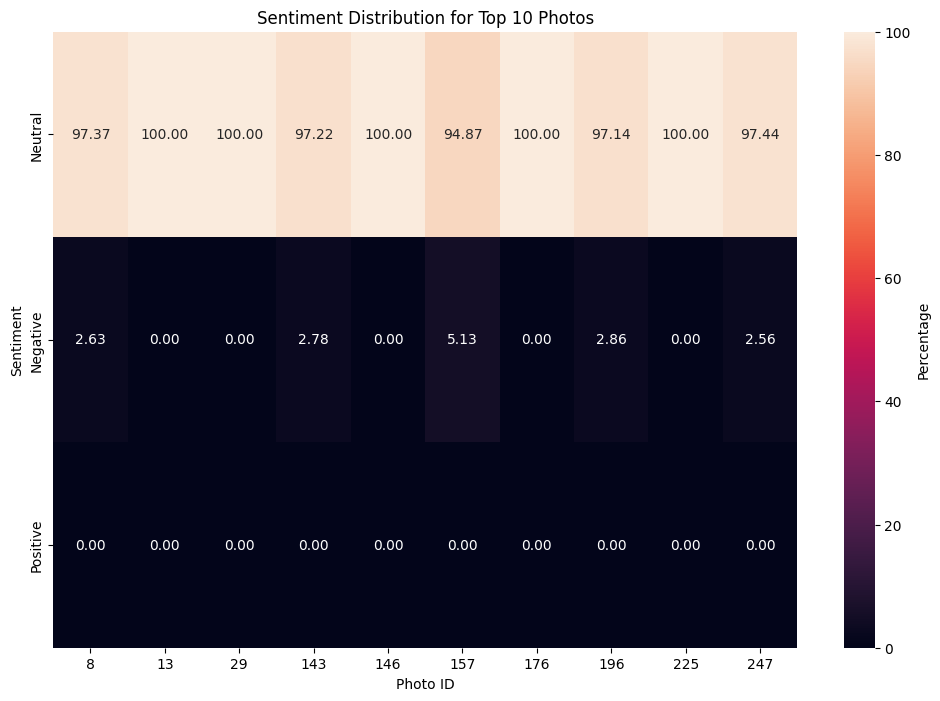

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of comments per photo
photo_comment_counts = df['Photo id'].value_counts()

# Identify the 10 photos that received the most comments
top_photos = photo_comment_counts.nlargest(10)

# For each of the top photos, calculate the sentiment distribution of their comments
top_photo_sentiments = df[df['Photo id'].isin(top_photos.index)].groupby('Photo id')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Convert to percentages
top_photo_sentiments = top_photo_sentiments * 100

print("Top 10 Photos by Comment Count:")
print(top_photos)
print("\nSentiment Distribution for Each Top Photo:")
print(top_photo_sentiments)

# Choose your favorite color palette
custom_palette = sns.color_palette("rocket", as_cmap=True)

# Plot the sentiment distribution for each of the top photos with custom colors
plt.figure(figsize=(12, 8))
sns.heatmap(top_photo_sentiments.T, cmap=custom_palette, annot=True, fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Sentiment Distribution for Top 10 Photos')
plt.xlabel('Photo ID')
plt.ylabel('Sentiment')
plt.show()


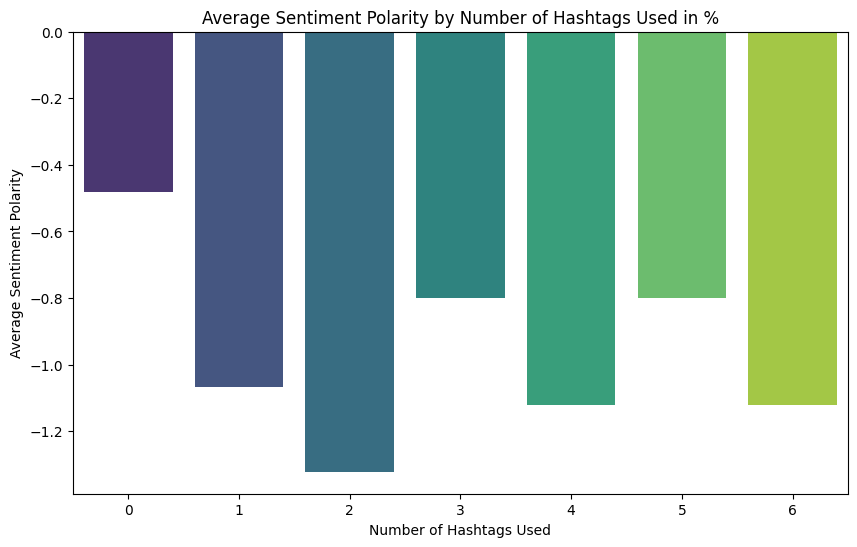

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the average sentiment polarity for comments with different numbers of hashtags
hashtag_sentiment = df.groupby('Hashtags used count')['sentiment_polarity'].mean() * 100

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_sentiment.index, y=hashtag_sentiment.values, palette="viridis")
plt.title('Average Sentiment Polarity by Number of Hashtags Used in %')
plt.ylabel('Average Sentiment Polarity')
plt.xlabel('Number of Hashtags Used')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#We find all comments have 3 words
# Calculate the length of each comment in terms of the number of words and characters
df['word_count'] = df['comment'].apply(lambda text: len(text.split()))
df['char_count'] = df['comment'].apply(len)

# Calculate the average length of comments for each sentiment category
average_lengths = df.groupby('sentiment')[['word_count', 'char_count']].mean()

print(tabulate(average_lengths, headers='keys', tablefmt='grid'))


+-------------+--------------+--------------+
| sentiment   |   word_count |   char_count |
+=============+==============+==============+
| Negative    |            3 |      19.025  |
+-------------+--------------+--------------+
| Neutral     |            3 |      19.3399 |
+-------------+--------------+--------------+
| Positive    |          nan |     nan      |
+-------------+--------------+--------------+


In [ ]:
from tabulate import tabulate

# Calculate the distribution of the number of hashtags used in the comments
hashtag_usage_counts = df['Hashtags used count'].value_counts()

# Sort by the number of hashtags
hashtag_usage_counts = hashtag_usage_counts.sort_index()

# Print the table
print(tabulate(pd.DataFrame({'Number of Hashtags Used': hashtag_usage_counts.index, 'Number of Comments': hashtag_usage_counts.values}),
                headers='keys', tablefmt='grid'))


+----+---------------------------+----------------------+
|    |   Number of Hashtags Used |   Number of Comments |
+====+===========================+======================+
|  0 |                         0 |                  624 |
+----+---------------------------+----------------------+
|  1 |                         1 |                 1872 |
+----+---------------------------+----------------------+
|  2 |                         2 |                 2496 |
+----+---------------------------+----------------------+
|  3 |                         3 |                  624 |
+----+---------------------------+----------------------+
|  4 |                         4 |                  624 |
+----+---------------------------+----------------------+
|  5 |                         5 |                  624 |
+----+---------------------------+----------------------+
|  6 |                         6 |                  624 |
+----+---------------------------+----------------------+


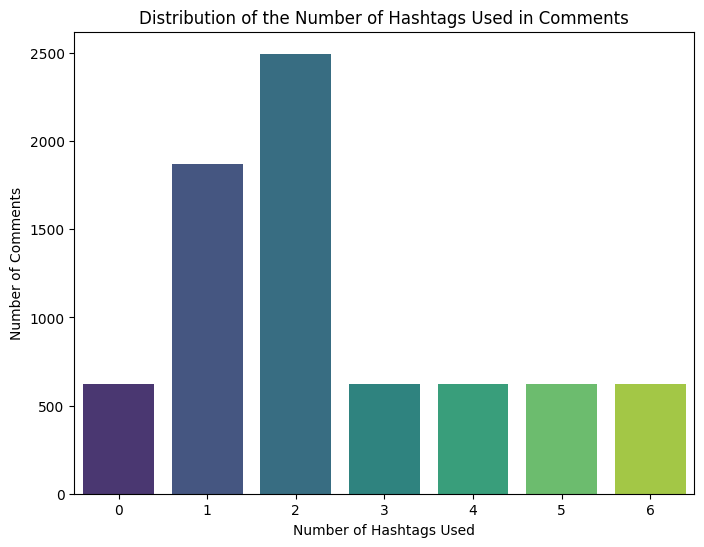

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the distribution of the number of hashtags used in the comments
hashtag_usage_counts = df['Hashtags used count'].value_counts()

# Sort by the number of hashtags
hashtag_usage_counts = hashtag_usage_counts.sort_index()

# Visualize the distribution of the number of hashtags used in the comments with previous colors
plt.figure(figsize=(8, 6))
sns.barplot(x=hashtag_usage_counts.index, y=hashtag_usage_counts.values, palette="viridis")
plt.title('Distribution of the Number of Hashtags Used in Comments')
plt.ylabel('Number of Comments')
plt.xlabel('Number of Hashtags Used')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from tabulate import tabulate

# Calculate the total number of comments and the distribution of comments by sentiment for each user
user_comments_sentiment = df.groupby('User  id')['sentiment'].value_counts().unstack().fillna(0)

# Calculate the total number of comments for each user
user_comments_sentiment['total_comments'] = user_comments_sentiment.sum(axis=1)

# Sort by the total number of comments
user_comments_sentiment = user_comments_sentiment.sort_values('total_comments', ascending=False)

# Identify the users who commented the most
top_commenting_users = user_comments_sentiment.head(10)

# Identify the users who commented the least
least_commenting_users = user_comments_sentiment.tail(10)

# Print the tables
print("Top Commenting Users:")
print(tabulate(top_commenting_users, headers='keys', tablefmt='grid'))
print("\nLeast Commenting Users:")
print(tabulate(least_commenting_users, headers='keys', tablefmt='grid'))


Top Commenting Users:
+------------+-----------+------------+------------+------------------+
|   User  id |   Neutral |   Negative |   Positive |   total_comments |
+============+===========+============+============+==================+
|         75 |       256 |          1 |          0 |              257 |
+------------+-----------+------------+------------+------------------+
|         91 |       256 |          1 |          0 |              257 |
+------------+-----------+------------+------------+------------------+
|         66 |       256 |          1 |          0 |              257 |
+------------+-----------+------------+------------+------------------+
|         21 |       254 |          3 |          0 |              257 |
+------------+-----------+------------+------------+------------------+
|         71 |       255 |          2 |          0 |              257 |
+------------+-----------+------------+------------+------------------+
|         41 |       254 |          3 |   

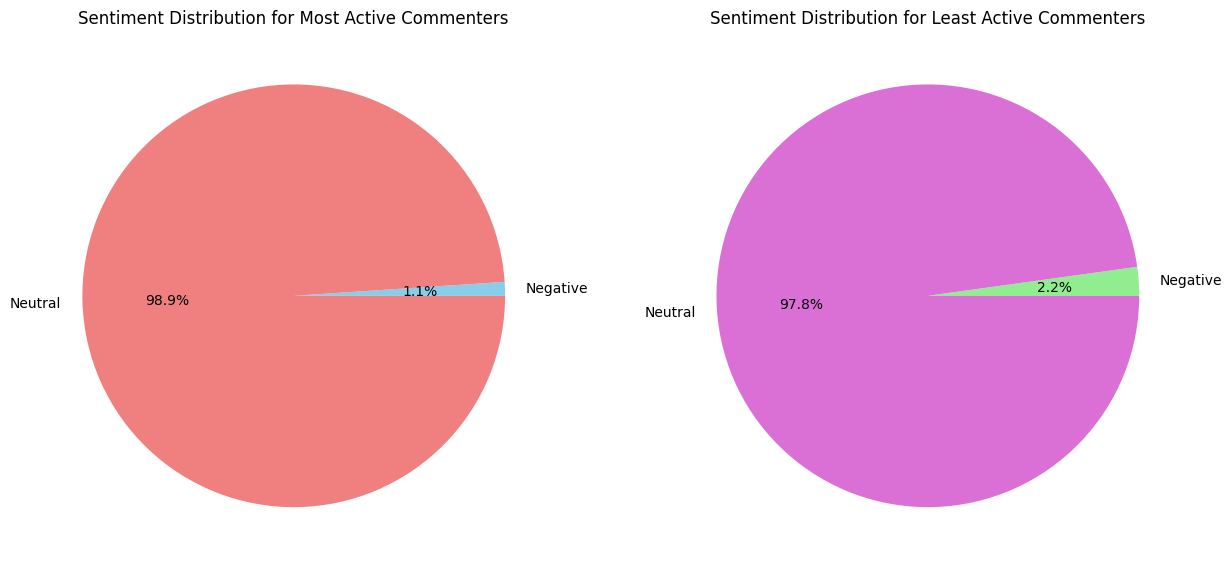

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# For the most frequent commenters
top_sentiment_distribution = top_commenting_users[['Negative', 'Neutral']].mean()
top_sentiment_distribution.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[0].set_ylabel('')
axs[0].set_title('Sentiment Distribution for Most Active Commenters')

# For the least frequent commenters
least_sentiment_distribution = least_commenting_users[['Negative', 'Neutral']].mean()
least_sentiment_distribution.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', colors=['lightgreen', 'orchid'])
axs[1].set_ylabel('')
axs[1].set_title('Sentiment Distribution for Least Active Commenters')

plt.show()

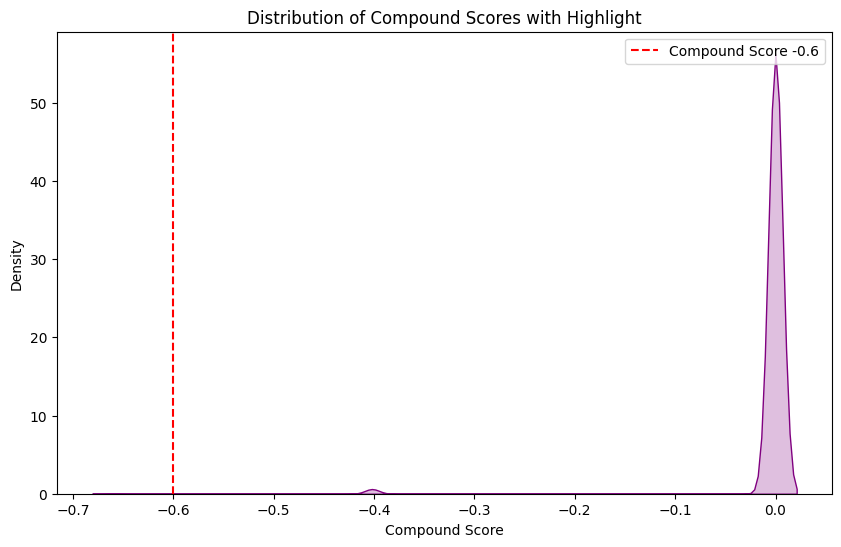

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot overall distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['compound_score'], fill=True, color='purple', common_norm=False)

# Highlight -0.6 peak
plt.axvline(x=-0.6, color='red', linestyle='--', label='Compound Score -0.6')

# Add labels and legend
plt.title('Distribution of Compound Scores with Highlight')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


Top 10 Most Negative Photos: (in %)
Photo id
6     -4.157586
207   -4.157586
184   -3.349167
231   -3.091538
55    -2.977037
120   -2.771724
173   -2.771724
238   -2.679333
4     -2.511875
157   -2.061026
Name: compound_score, dtype: float64


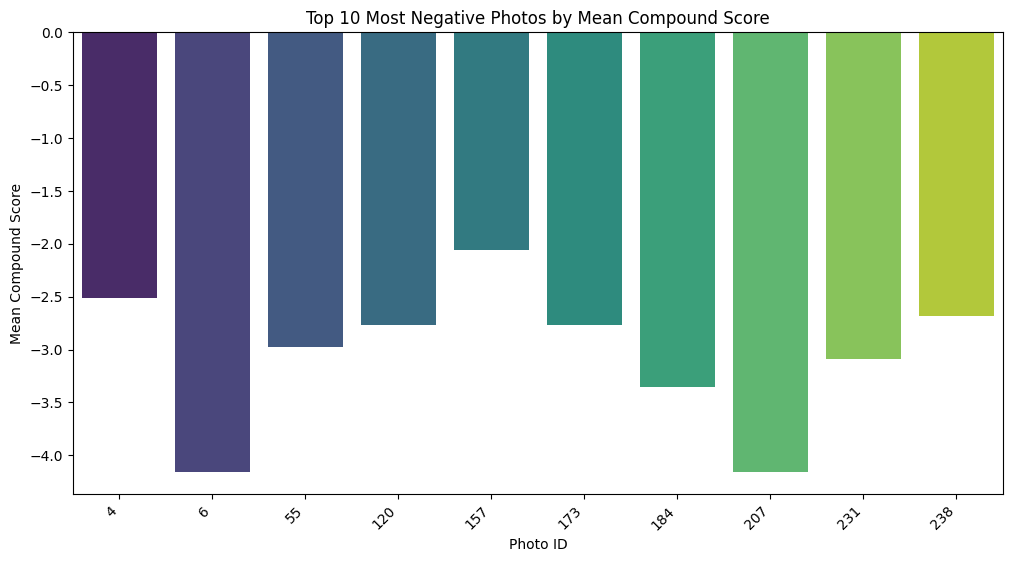

In [ ]:
# Group by Photo id and calculate the mean compound score
photo_compound_scores = df.groupby('Photo id')['compound_score'].mean()*100

# Identify the top 10 photos with the most negative mean compound scores
top_10_negative_photos = photo_compound_scores.nsmallest(10)

# Display the top 10 most negative photos and their mean compound scores
print("Top 10 Most Negative Photos: (in %)")
print(top_10_negative_photos)

# Plot the distribution of mean compound scores for each photo
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_negative_photos.index, y=top_10_negative_photos.values, palette="viridis")
plt.title('Top 10 Most Negative Photos by Mean Compound Score')
plt.xlabel('Photo ID')
plt.ylabel('Mean Compound Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


Top 10 Users with the Most Negative Compound Scores:(in %)
User  id
16   -2.318654
61   -2.078793
97   -1.773088
32   -1.435357
52   -1.435357
72   -1.255937
70   -1.164928
43   -1.116389
93   -1.047143
63   -1.004750
Name: compound_score, dtype: float64


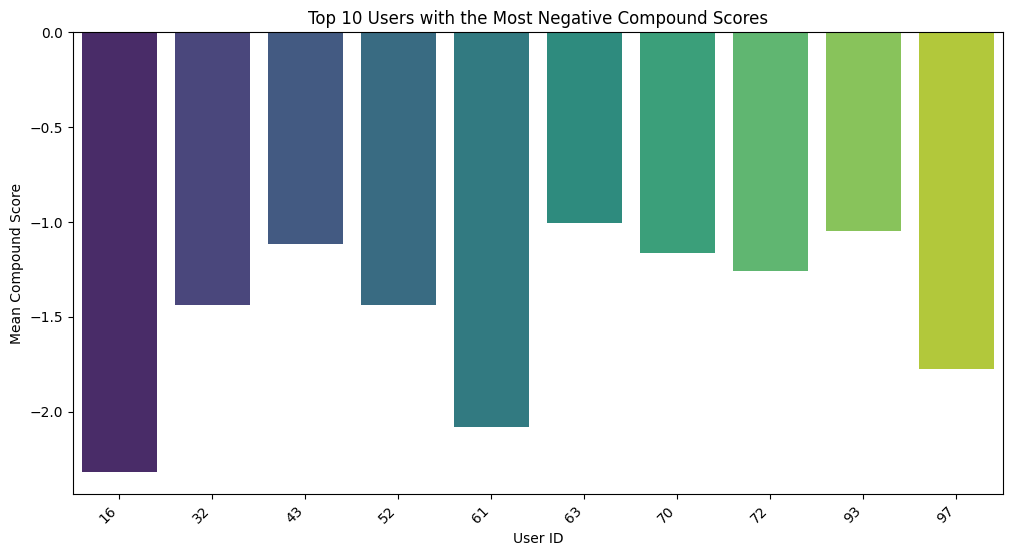

In [ ]:
import seaborn as sns

# Group by User id and calculate the mean compound score
user_compound_scores = df.groupby('User  id')['compound_score'].mean()*100

# Identify the top 10 users with the most negative mean compound scores
top_10_negative_users = user_compound_scores.nsmallest(10)

# Display the top 10 users with the most negative mean compound scores
print("Top 10 Users with the Most Negative Compound Scores:(in %)")
print(top_10_negative_users)

# Plot the distribution of mean compound scores for each user using viridis color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_negative_users.index, y=top_10_negative_users.values, palette="viridis")
plt.title('Top 10 Users with the Most Negative Compound Scores')
plt.xlabel('User ID')
plt.ylabel('Mean Compound Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


*Topics assigned to comments*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

comments = df['comment']

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
comment_dtm = vectorizer.fit_transform(comments)

# Fit Latent Dirichlet Allocation (LDA) model
num_topics = 5  # You can adjust the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(comment_dtm)

# Assign topics to comments
topic_assignments = lda_model.transform(comment_dtm)
df['topic'] = topic_assignments.argmax(axis=1)

# Display topics assigned to comments
print("Topics Assigned to Comments:")
print(df[['comment', 'topic']].head(10))


Topics Assigned to Comments:
                          comment  topic
0                 unde at dolorem      3
1                 quae ea ducimus      0
2              alias a voluptatum      0
3            facere suscipit sunt      4
4          totam eligendi quaerat      3
5              vitae quia aliquam      3
6  exercitationem occaecati neque      3
7                  sint ad fugiat      4
8           nesciunt aut nesciunt      3
9           laudantium ut nostrum      3


*Trying to predict compound score using Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Convert 'compound_score' to binary classes (adjust threshold as needed)
df['sentiment_class'] = df['compound_score'].apply(lambda x: 'Negative' if x < 0 else 'Neutral')
# Select features and target variable
X = df[['emoji used', 'Hashtags used count', 'Photo id', 'compound_score', 'User  id']]
y = df['sentiment_class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
# Train the model
lr_classifier.fit(X_train, y_train)
# Predictions on the test set
y_pred = lr_classifier.predict(X_test)
# Display the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.35      0.52        17
     Neutral       0.99      1.00      1.00      1481

    accuracy                           0.99      1498
   macro avg       1.00      0.68      0.76      1498
weighted avg       0.99      0.99      0.99      1498


Accuracy: 0.992656875834446


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Convert 'compound_score' to binary classes (adjust threshold as needed)
df['sentiment_class'] = df['compound_score'].apply(lambda x: 'Negative' if x < 0 else 'Neutral')
# Select features and target variable
X = df[['emoji used', 'Hashtags used count', 'Photo id', 'compound_score', 'User  id']]
y = df['sentiment_class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
# Initialize Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)
# Train the model
perceptron_classifier.fit(X_train, y_train)
# Predictions on the test set
y_pred = perceptron_classifier.predict(X_test)
# Display the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        17
     Neutral       0.99      1.00      0.99      1481

    accuracy                           0.98      1498
   macro avg       0.49      0.50      0.50      1498
weighted avg       0.98      0.98      0.98      1498


Accuracy: 0.9839786381842457


In [ ]:
df['sentiment_class'].unique()

array(['Neutral', 'Negative'], dtype=object)

In [ ]:
#Hence, we are able to accurately predict the possibility of negative and neutral comments (compound score) with an accuracy of 98.931%